In [98]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

In [99]:
con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-Oil.sqlite"))

In [100]:
tweet_df = pd.read_sql_query(f"SELECT * from oil_tweets_count", con_pharma)

In [101]:
len(tweet_df['tweetDate'].unique())

779

In [102]:
tweet_df.describe()

,count
count,53253.000000
mean,15.438942
std,46.263338
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,5030.000000


<AxesSubplot:>

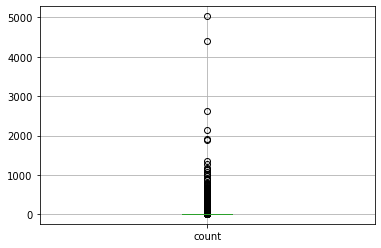

In [103]:
tweet_df.boxplot()

In [104]:
tweet_df = pd.read_sql_query(f"SELECT * from oil_tweets_count WHERE count > 10", con_pharma)

In [105]:
tweet_df.describe()

,count
count,8698.000000
mean,43.299609
std,110.350556
min,20.000000
25%,20.000000
50%,20.000000
75%,30.000000
max,5030.000000


<AxesSubplot:>

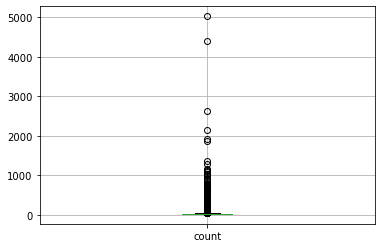

In [106]:
tweet_df.boxplot()

In [107]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 40 if x > 40 else x) 

In [108]:
tweet_df.describe()

,count
count,8698.000000
mean,26.366981
std,8.440531
min,20.000000
25%,20.000000
50%,20.000000
75%,30.000000
max,40.000000


<AxesSubplot:>

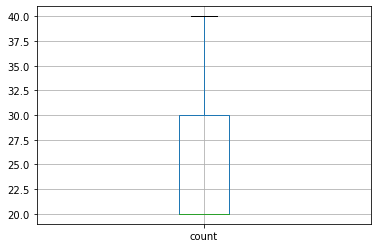

In [109]:
tweet_df.boxplot()

In [97]:
len(tweet_df['tweetDate'].unique())

773

In [111]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [112]:
write_to_db(con_pharma, tweet_df)